### DeepAD
https://github.ibm.com/innovation-exchange/DeepAD/tree/master <br>
https://github.ibm.com/wiotp/Maximo-Asset-Monitor/issues/1672 <br>

**source** Armstrong-pump_power_anomaly <br>
**prediction server** python3 server.py False Armstrong-pump_power_anomaly /Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction 500 <br>

In [39]:
import os

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**data**

In [168]:
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/1096-first-50-hours.csv' #armstrong
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/IOT_NUMBERTAG.csv' #numbertag

# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/temperature_spike_anomaly.csv'; kwargs = {'header':None, 'parse_dates':[0]} # temperature
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/armstark_strong_vibrations_anomaly.csv'; kwargs = {'header':None, 'parse_dates':[0]} # armstark (bad)
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/armstark_no_anomaly.csv'; kwargs = {'header':None, 'parse_dates':[0]} # armstark (good)
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/cakebread36.csv'; kwargs = {'header':None, 'parse_dates':[0]} # cakebread
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/generated-spike-anomaly.csv'; kwargs = {'header':None, 'parse_dates':[0]} # generated-spike-anomaly.csv

In [169]:
df = pd.read_csv(filepath, index_col=False, **kwargs)

In [170]:
df.head()

,0,1
0,2019-09-26 18:08:11.262975,79.333185
1,2019-09-26 18:18:06.486895,77.907810
2,2019-09-26 18:23:09.614009,75.704007
3,2019-09-26 18:48:06.433222,72.743794
4,2019-09-26 18:53:14.068107,69.056749


In [ ]:
#for numbertag
timestampcolumn = 'RCV_TIMESTAMP_UTC'

#filter to only 1 entity
# entity = 'e6286081-c9af-560b-b051-6a5825911161' #device 2
entity = '49c573ca-3eb1-5e40-97c0-838053004567' #device 7
df = df[df['DEVICEID'] == entity]

#make timestamp column unix
df['timestamp'] = pd.to_datetime(df[timestampcolumn], format='%Y-%m-%d-%H.%M.%S.%f')
df.timestamp = df.timestamp.astype(np.int64)

In [ ]:
#for armstrong
df['TIMESTAMP'] = df['TIMESTAMP'] - 2e9

In [175]:
# for armstark, temperature, cakebread : convert to unix time
df[0] = df[0].astype(np.int64) / 10**9 

In [148]:
df.dtypes #DeepAD reads input as str and convetrs to float

0    float64
1    float64
dtype: object

In [174]:
df.dropna().describe()

,1
count,792.000000
mean,135.987836
std,795.161049
min,7.986673
25%,40.518593
50%,59.656417
75%,74.563127
max,8000.000000


In [171]:
#find data with duplicated timestamp
duplicate_timestamp = df[df[0].duplicated() == True][0].to_list()
df[df[0].isin(duplicate_timestamp)]

,0,1


In [172]:
df = df.drop_duplicates([0])

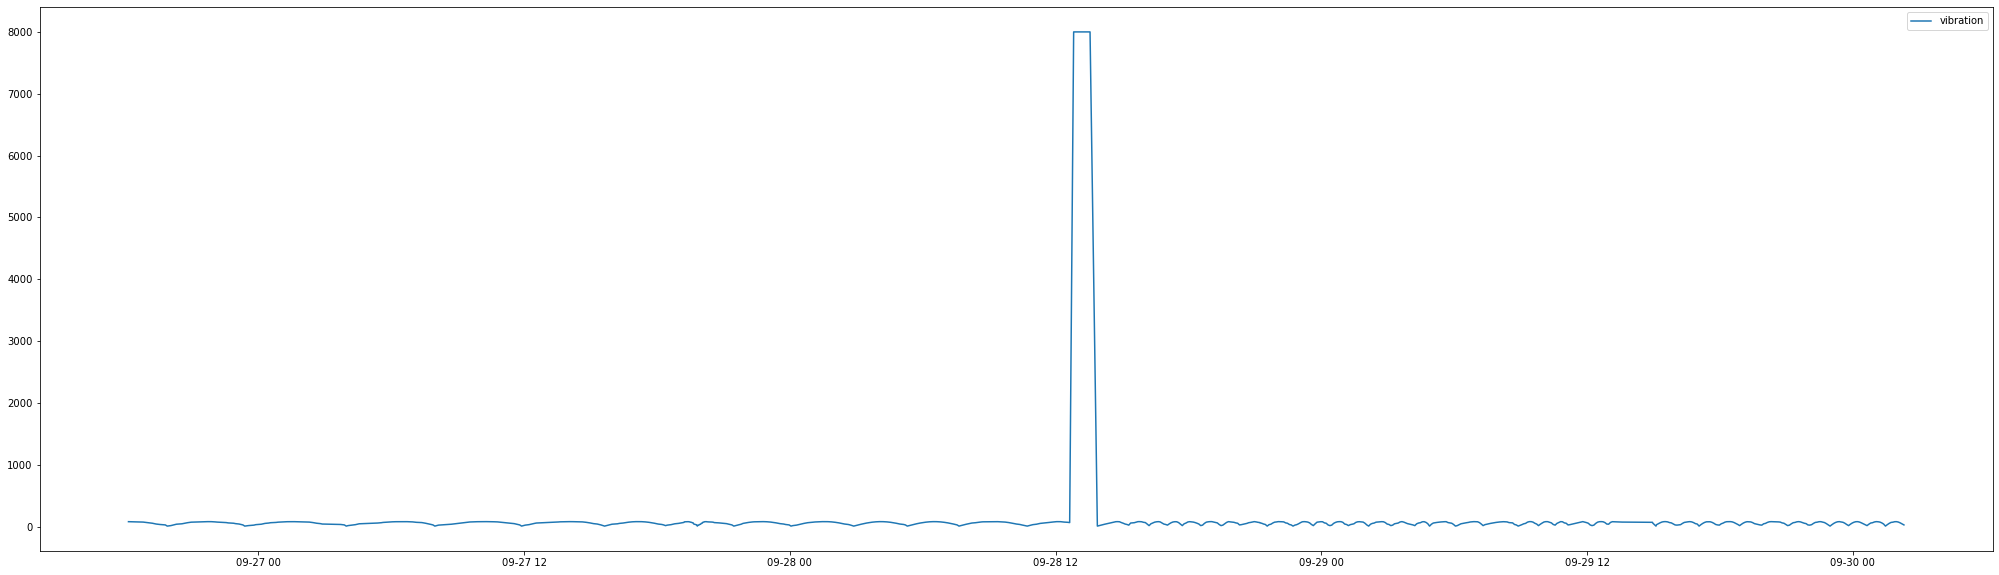

In [173]:
#plot anomalies in power
#plot asthetics
plot_size = (35, 10)
fig, ax = plt.subplots(figsize=plot_size)

#plot value curve
plt.plot(df[0], df[1], label="vibration")
    
#plot asthetics
plt.legend()
plt.show(block=False)

In [176]:
# train_w_datapoints = 500  # armstrong
# train_w_datapoints = 2000 # numbertag
# train_w_datapoints = 2000 # temperature
# train_w_datapoints = 4300 # armstark
# train_w_datapoints = 4500 # armstark-no-anomaly
# train_w_datapoints = 3500 # cakebread36
train_w_datapoints = 500 # generated-spike

**input for deepad training module**

In [177]:
df.dropna()[:train_w_datapoints].describe()

,0,1
count,5.000000e+02,500.000000
mean,1.569624e+09,183.226157
std,5.225865e+04,997.971738
min,1.569521e+09,7.986673
25%,1.569585e+09,41.240110
50%,1.569625e+09,62.666153
75%,1.569668e+09,75.704007
max,1.569710e+09,8000.000000


In [178]:
# input for training (Has to be atleast 500 datapoints)
# filepath = '~/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/Armstrong-pump_power_anomaly/Armstrong-pump_power_anomaly.csv'
# filepath = '~/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/Armstrong-pump_power_anomaly/Armstrong-pump_power_anomaly.csv #armstrong
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/Numbertag/Numbertag.csv' #numbertag
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/temperature/temperature.csv' #temperature
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/armstark/armstark.csv' # armstark
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/armstark-no-anomaly/armstark-no-anomaly.csv' # armstark-no-anomaly
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/cakebread36/cakebread36.csv' # cakebread36
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/generated-spike-anomaly/generated-spike-anomaly.csv' # generated-spike-anomaly

df.dropna()[:train_w_datapoints].to_csv(filepath, 
                   header=None, 
                   index=None,
                   columns=[0, 1])

**input for deepad prediction module**

In [204]:
# input for testing prediction
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction/armstrong_1_input.csv' #armstrong TIMESTAMP POWER
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_numbertag/numbertag_1_input.csv' #numbertag timestamp VALUE
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_temperature/temperature_2_input.csv' #temperature 0 1
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_armstark/armstark_2_input.csv' #armstark 0 1
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_armstark-no-anomaly/armstark-no-anomaly_1_input.csv' #armstark 0 1
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_cakebread36/cakebread36_1_input.csv' # cakebread36
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_generated-spike-anomaly/generated-spike-anomaly_2_input.csv' # generated-spike-anomaly

df.dropna()[train_w_datapoints:].to_csv(filepath, 
                   header=None, 
                   index=None,
                   columns=[0, 1])

In [188]:
df.dropna()[train_w_datapoints:].describe()

,0,1
count,2.920000e+02,292.000000
mean,1.569758e+09,55.100302
std,2.998148e+04,21.158235
min,1.569710e+09,7.986673
25%,1.569732e+09,38.354043
50%,1.569755e+09,59.656417
75%,1.569785e+09,74.563127
max,1.569810e+09,79.965888


**prediciton output from deepad prediction server**

In [205]:
# read in server prediction output 
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction/armstrong_1_input.csv_predictions' #armstrong
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_numbertag/numbertag_1_input.csv_predictions' #numbertag
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_temperature/temperature_2_input.csv_predictions' # temperature
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_armstark/armstark_2_input.csv_predictions' #armstark
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_armstark-no-anomaly/armstark-no-anomaly_1_input.csv_predictions' #armstark 0 1
# filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_cakebread36/cakebread36_1_input.csv_predictions' # cakebread36
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_generated-spike-anomaly/generated-spike-anomaly_2_input.csv_predictions' # generated-spike-anomaly

timestampcolumn = 'timestamp'
df_anomaly = pd.read_csv(filepath, index_col=False)
df_anomaly.describe()

,timestamp,value,error,is_anomaly,score
count,7.920000e+02,792.000000,792.000000,792.000000,792.000000
mean,1.569674e+09,135.987836,-0.466311,0.008838,135.083704
std,7.902045e+04,795.161049,16.052063,0.093655,3883.291896
min,1.569521e+09,7.986673,-451.373375,0.000000,-451.373375
25%,1.569613e+09,40.518593,0.002575,0.000000,-3.523488
50%,1.569677e+09,59.656417,0.015523,0.000000,-3.054777
75%,1.569738e+09,74.563127,0.096616,0.000000,-2.609029
max,1.569810e+09,8000.000000,1.000000,1.000000,109280.257437


In [206]:
df_anomaly.head()

,timestamp,value,error,is_anomaly,score
0,1.569521e+09,79.333185,0.339987,0,-2.469021
1,1.569522e+09,77.907810,0.004811,0,-3.054526
2,1.569522e+09,75.704007,0.000582,0,-3.102303
3,1.569524e+09,72.743794,0.000725,0,-3.089014
4,1.569524e+09,69.056749,0.007152,0,-3.211181


In [207]:
df_anomaly[df_anomaly.is_anomaly == 1]

,timestamp,value,error,is_anomaly,score
345,1.569656e+09,7.986673,1.0,1,3.432949
391,1.569675e+09,8000.000000,1.0,1,109280.257437
392,1.569675e+09,8000.000000,1.0,1,556.980690
602,1.569741e+09,41.240110,1.0,1,1.116780
603,1.569741e+09,15.893546,1.0,1,6.823795
672,1.569770e+09,7.986673,1.0,1,18.886376
674,1.569770e+09,62.666153,1.0,1,0.178171


In [208]:
# edit columns for pretty plots
df_anomaly[timestampcolumn] = pd.to_datetime(df_anomaly[timestampcolumn], unit='s')
df_anomaly['plot_anomaly'] = df_anomaly.is_anomaly.replace([0, 1],  [np.nan, df_anomaly.value.max()])

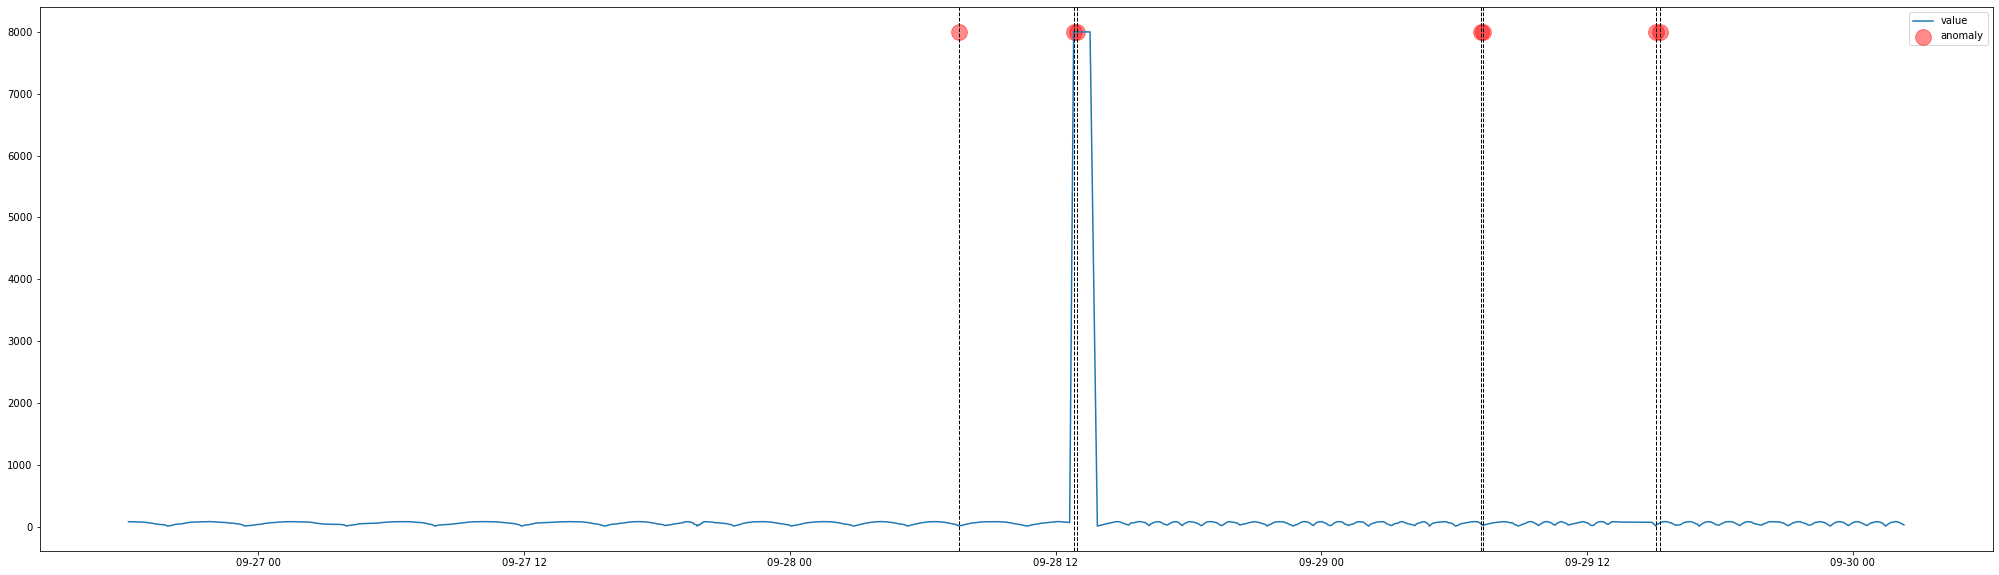

In [209]:
#plot anomalies in power
#plot asthetics
plot_size = (35, 10)
fig, ax = plt.subplots(figsize=plot_size)

#plot anomalies and Power value curve
plt.scatter(df_anomaly.timestamp, df_anomaly['plot_anomaly'], label="anomaly", c='red', s=250, alpha=0.45)
plt.plot(df_anomaly.timestamp, df_anomaly['value'], label="value")

#vertical lines
xpositions_anomaly = df_anomaly[df_anomaly.is_anomaly == 1]['timestamp'].to_list()
for x in xpositions_anomaly:
    plt.axvline(x=x, color='k', linestyle='--', linewidth=1)
    
#plot asthetics
plt.legend()
plt.show(block=False)

In [221]:
test_speed_df = pd.DataFrame({'a': [1, 2, 3, 4]})
test_speed_out = [1]

In [222]:
%%timeit
np.zeros((len(test_speed_out), ) + test_speed_df.shape)

951 ns ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [223]:
%%timeit
score = []
for out in test_speed_out:
    score.append(np.zeros(test_speed_df.shape))

978 ns ± 31.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
